# PyVADesign Tutorial

Welcome to the PyVADesign tutorial! 

In this notebook, we will explore the process of designing dsDNA fragments and corresponding primers for a number of selected mutations.

## Tutorial Overview

In this tutorial, we will cover the following topics:

1. Importing required modules and packages
2. Loading the vector sequence and the Gene of Interest
3. Parsing mutation data
4. Designing dsDNA fragments and visualize the fragment regions
5. Designing primers that prepare the target plasmid for insertion of the dsDNA fragment as well as sequencing primers

Let's get started with the first step: importing the required modules and packages.

### 1. Importing Required Modules and Packages

In [1]:
import os

from src.mutation import Mutation
from src.sequence import Vector, Gene
from src.eblocks import EblockDesign
from src.primer import DesignPrimers
from src.plot import Plot

# TODO Remove
%reload_ext autoreload
%autoreload 2

### 2. Loading and Analyzing the Gene Sequence

To successfully run the design process, the gene of interest must be provided in FASTA format and the plasmid sequence should be available in either DNA (.dna) or GenBank (.gb)

For the purpose of this tutorial we will focus on Mycobacterial membrane protein Large 3 (MmpL3) of *Mycobacterium avium*. MmpL3 is a lipid transporter that has become a promising drug target for developing new anti-mycobacterial therapies. 

In [2]:
# Create a gene object and parse the gene sequence from the data directory

sequence_file = os.path.join('tutorial-data', 'A0A0H2ZYQ2.fasta')  # Gene sequence in fasta format
gene_instance = Gene(stopcodon=False)
gene_instance.parse_sequence(sequence_file)

# Create a plasmid object and parse the input plasmid from the data directory

vector_file = os.path.join('tutorial-data', 'pACE_mmpL3-Mav.dna')  # Vector sequence including MmpL3 in dna format
vector_instance = Vector(gene=gene_instance)
vector_instance.parse_vector(vector_file)

### 3. Parsing mutation data

The desired mutations should be listed in a text file.

Here, we create a Mutation() object and parse the desired mutations. 

In [5]:
# Create a Mutation object and parse the input mutations from the files/ directory

mutations_file = os.path.join('tutorial-data', 'mutations.txt')  # text file containing mutations
mutation_instance = Mutation()
mutation_instance.parse_mutations(mutations_file)

# Print the mutations that were parsed

mutation_instance.print_mutations()

The selected mutations are:
	Insert    	C17-G     
	Insert    	G24-RSEMCTMQ
	Deletion  	Q33-S43   
	Deletion  	D76-V84   
	Combined  	P95S, L141N, N142H, V128V, Y144C
	Insert    	M151-TYWFMHNV
	Mutation  	Q152K     
	Combined  	Q160K, P207P, V202D, L194Y, M182D
	Deletion  	R181-M182 
	Combined  	V187A, A208C, G205S, S218S, L206D
	Combined  	I221W, I246P, V254S
	Insert    	L241-RG   
	Insert    	D249-LYVQE
	Combined  	R274T, I290N, H306H, S286G
	Deletion  	V305-L308 
	Insert    	L331-LI   
	Mutation  	A340P     
	Deletion  	A366-E376 
	Mutation  	V409R     
	Insert    	P411-SASAY
	Deletion  	M420-P427 
	Combined  	L425D, F442S, V453D, T447D, R471R
	Deletion  	L433-Q435 
	Mutation  	N458F     
	Combined  	N472Y, G479L, R514W
	Mutation  	T506P     
	Deletion  	P508-V513 
	Mutation  	G511C     
	Combined  	G519R, A527Y, G548V, N537L, I530T
	Combined  	A531L, Y545L, S556T, F561Q, A574I
	Insert    	L533-WCCWM
	Mutation  	D555I     
	Mutation  	H558N     
	Mutation  	G573M     
	Insert    	V5

In [6]:
# count number of mutations per type

num_point_mutations = [i.type == 'Mutation' for i in mutation_instance.mutations].count(True)
print(f'Number of point mutations: {num_point_mutations}')
num_double_mutations = [i.type == 'Combined' for i in mutation_instance.mutations].count(True)
print(f'Number of double mutations: {num_double_mutations}')
num_insert = [i.type == 'Insert' for i in mutation_instance.mutations].count(True)
print(f'Number of insertions: {num_insert}')
num_deletion = [i.type == 'Deletion' for i in mutation_instance.mutations].count(True)
print(f'Number of deletions: {num_deletion}')
print('-----------------------------------')
total_mutations = num_point_mutations + num_double_mutations + num_insert + num_deletion
print(f'Total number of mutations: {total_mutations}')

Number of point mutations: 10
Number of double mutations: 10
Number of insertions: 10
Number of deletions: 10
-----------------------------------
Total number of mutations: 40


### 4. Designing dsDNA fragments and visualize the fragment regions

Next, we create an design instance that can initiate the design of the dsDNA fragments. Here, we choose as optimization method amount_optimization that aims to use as little fragment regions as possible. Another option would be to do cost_optimization, that aims to use as few bp as possible, which usually leads to a higher number of different fragment regions

In [7]:
# we use a settingsfile that contains input parameters for the design class, such as the minimum and maximum length of the dsDNA fragments

settingsfile = os.path.join('tutorial-data', 'dsDNA-Design-settings-AmountOpt.txt')

# Create an Eblocks object based on the input mutations and the gene sequence

design_instance_amount = EblockDesign(mutation_instance=mutation_instance,
                                      vector_instance=vector_instance,
                                      gene_instance=gene_instance,
                                      settings_file=settingsfile)

Now we can run the design method to generate the dsDNA fragments

In [8]:
design_instance_amount.run_design_eblocks()  # Run the design

mutation_instance    : <src.mutation.Mutation object at 0x7f807c0b93f0>
vector_instance      : <src.sequence.Vector object at 0x7f7f8299e6b0>
gene_instance        : <src.sequence.Gene object at 0x7f807c0b94e0>
output_dir           : tutorial-output
settings_file        : tutorial-data/dsDNA-Design-settings-AmountOpt.txt
cost_optimization    : False
amount_optimization  : True
eblock_colors        : {0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c', 3: '#d62728', 4: '#9467bd', 5: '#8c564b', 6: '#e377c2', 7: '#7f7f7f', 8: '#bcbd22', 9: '#17becf', 10: '#aec7e8', 11: '#ffbb78', 12: '#98df8a', 13: '#ff9896', 14: '#c5b0d5', 15: '#c49c94', 16: '#f7b6d2', 17: '#c7c7c7', 18: '#dbdb8d', 19: '#9edae5', 20: '#393b79', 21: '#ff7f0e', 22: '#2ca02c', 23: '#8c564b', 24: '#e377c2', 25: '#7f7f7f', 26: '#bcbd22', 27: '#17becf'}
clone_files          : True
verbose              : True
codon_usage          : U00096
bp_price             : 0.05
max_eblock_length    : 1500
min_eblock_length    : 300
min_overlap       

Visualize the fragment regions on the Gene of Interest

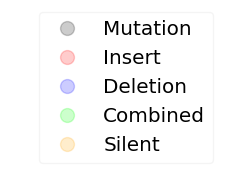

In [9]:
# Now that we have designed the eblocks, we can visualize them using the Plot class

plot_instance = Plot(eblocks_design_instance=design_instance_amount,
                     output_dir=design_instance_amount.output_dir,
                     gene_instance=gene_instance,
                     mutation_instance=mutation_instance,
                     vector_instance=vector_instance,
                     show=True)

plot_instance.plot_mutation_legend()

From this plot we can see that 2regions are defined with multiple mutations in each region. The mutations are colored by their type. The Silent mutations in the beginning and end of every fragment region are the silent mutation that can be used to sequence the clone

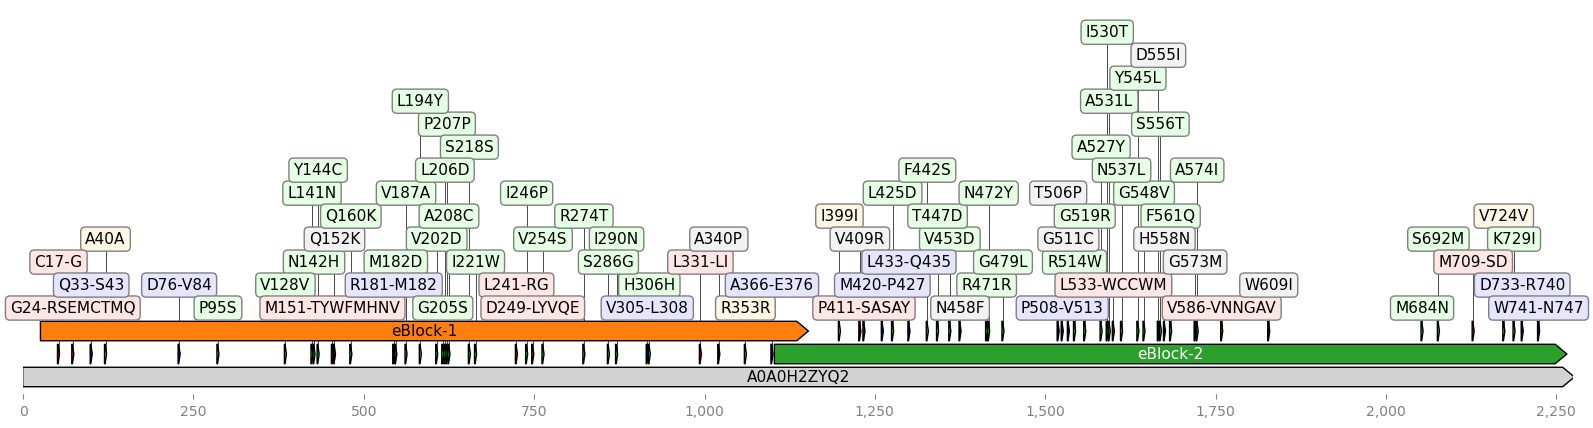

In [10]:
plot_instance.plot_eblocks_mutations(figure_length=20,
                                     figure_width=5)

Let's now check the effect that the optimization method has on the design of the dsDNA fragments by changing from amount optimization to cost optimization

mutation_instance    : <src.mutation.Mutation object at 0x7f807c0b93f0>
vector_instance      : <src.sequence.Vector object at 0x7f7f8299e6b0>
gene_instance        : <src.sequence.Gene object at 0x7f807c0b94e0>
output_dir           : tutorial-output
settings_file        : tutorial-data/dsDNA-Design-settings-CostOpt.txt
cost_optimization    : True
amount_optimization  : False
eblock_colors        : {0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c', 3: '#d62728', 4: '#9467bd', 5: '#8c564b', 6: '#e377c2', 7: '#7f7f7f', 8: '#bcbd22', 9: '#17becf', 10: '#aec7e8', 11: '#ffbb78', 12: '#98df8a', 13: '#ff9896', 14: '#c5b0d5', 15: '#c49c94', 16: '#f7b6d2', 17: '#c7c7c7', 18: '#dbdb8d', 19: '#9edae5', 20: '#393b79', 21: '#ff7f0e', 22: '#2ca02c', 23: '#8c564b', 24: '#e377c2', 25: '#7f7f7f', 26: '#bcbd22', 27: '#17becf'}
clone_files          : True
verbose              : True
codon_usage          : U00096
bp_price             : 0.05
max_eblock_length    : 1500
min_eblock_length    : 300
min_overlap         

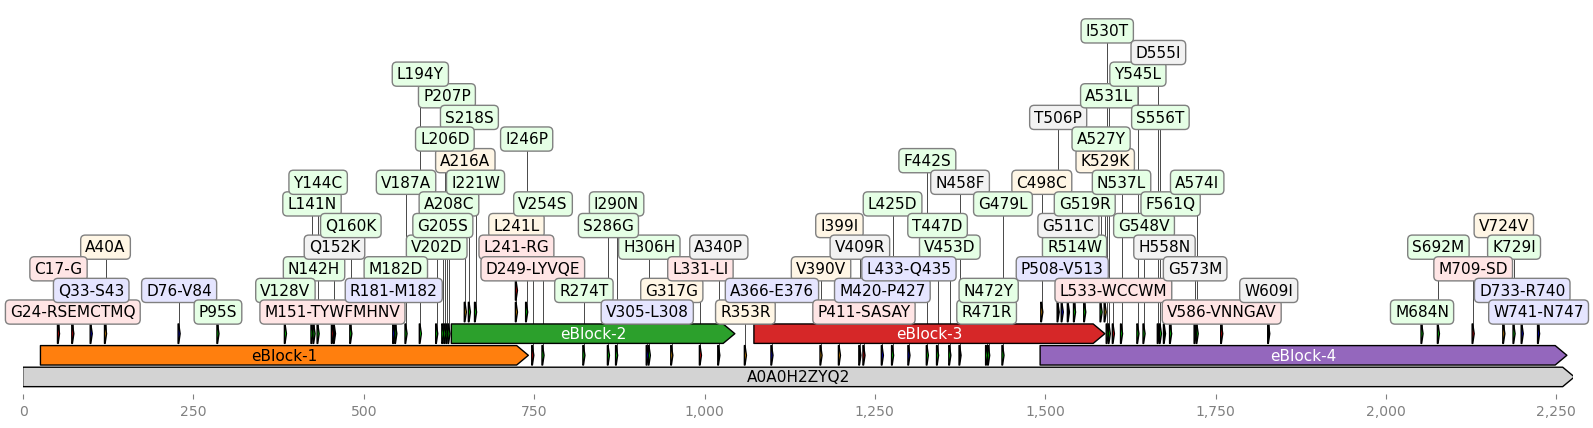

In [11]:
settingsfile = os.path.join('tutorial-data', 'dsDNA-Design-settings-CostOpt.txt')

design_instance_cost = EblockDesign(mutation_instance=mutation_instance,
                                    vector_instance=vector_instance,
                                    gene_instance=gene_instance,
                                    settings_file=settingsfile)

design_instance_cost.run_design_eblocks()

plot_instance = Plot(eblocks_design_instance=design_instance_cost,
                     output_dir=design_instance_cost.output_dir,
                     gene_instance=gene_instance,
                     mutation_instance=mutation_instance,
                     vector_instance=vector_instance,
                     show=True)

plot_instance.plot_eblocks_mutations(figure_length=20,
                                     figure_width=5)

Using the cost optmization setting, 4 different fragment regions are created, thus increasing the number of PCR reactiong that need to be performed to insert all different dsDNA fragments

In [12]:
# Lets check the cost difference between the different optmization methods

bp_price = design_instance_amount.bp_price
print(f'Price per bp: {bp_price}')

# Costs amount optmization

price_amount_opt = design_instance_amount.cost
print(f'Total cost amount optimization: {price_amount_opt}')

price_cost_opt = design_instance_cost.cost
print(f'Total cost cost optimization: {price_cost_opt}')

Price per bp: 0.05
Total cost amount optimization: 5383.3
Total cost cost optimization: 3056.3


### 5. Designing primers that prepare the target plasmid for insertion of the dsDNA fragment as well as sequencing primers

The primers are designed using the Primer3 package

In [13]:
# Create a primer design object and run the primer design process for IVA primers to prepare the plasmids for insertion of dsDNA fragments

settingsfile = 'settings/primer3-settings.txt'
seq_settingsfile = 'settings/primer3-seq-settings.txt'

primers_instance = DesignPrimers(mutation_instance=mutation_instance,
                                 eblocks_design_instance=design_instance_amount,
                                 primers_settingsfile=settingsfile,
                                 seqprimers_settingsfile=seq_settingsfile,
                                 vector_instance=vector_instance,
                                 output_dir=design_instance_amount.output_dir)

primers_instance.run_design()

Designing primer pairs ...
Designing sequencing primers ...
start 4956 length 400
{'PRIMER_WARNING': 'No right primer found in range 5061 - 5101', 'PRIMER_LEFT_EXPLAIN': 'sequencing locations 2, considered 800, GC content failed 410, low tm 45, high tm 242, high hairpin stability 40, ok 2', 'PRIMER_RIGHT_EXPLAIN': 'sequencing locations 2, considered 800, GC content failed 605, low tm 37, high tm 113, ok 1', 'PRIMER_PAIR_EXPLAIN': 'considered 0, ok 0', 'PRIMER_LEFT_NUM_RETURNED': 2, 'PRIMER_RIGHT_NUM_RETURNED': 1, 'PRIMER_INTERNAL_NUM_RETURNED': 0, 'PRIMER_PAIR_NUM_RETURNED': 0, 'PRIMER_PAIR': [], 'PRIMER_LEFT': [{'PENALTY': 1.3369764263889579, 'SEQUENCE': 'atcgacgggctgatgct', 'COORDS': [4713, 17], 'TM': 58.33697642638896, 'GC_PERCENT': 58.8235294117647, 'SELF_ANY_TH': 0.0, 'SELF_END_TH': 0.0, 'HAIRPIN_TH': 39.58603833194718, 'END_STABILITY': 3.79}, {'PENALTY': 1.0876424114507017, 'SEQUENCE': 'ccgcagttgttctcgca', 'COORDS': [5218, 17], 'TM': 57.9123575885493, 'GC_PERCENT': 58.82352941176